# Heart Attack Analysis


In [150]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

In [151]:
# Connect to PostgreSQL

conn=psycopg2.connect(
    dbname="Heart_Disease",
    user="postgres",
    password="1111",
    host="localhost",
    port="5432"
)

In [152]:
# Loding dataset into dataframe

query = "SELECT * FROM patient;"
df = pd.read_sql(query,conn)
print("Dataset Preview:")
print(df.head())

C:\Users\2020\AppData\Local\Temp\ipykernel_12936\696869566.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,conn)


Dataset Preview:
   age sex chestpaintype  restingbp  cholesterol  fastingbs restingecg  maxhr  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  exerciseangina  oldpeak st_slope  heartdisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [153]:
# Cheking for null values in the dataset
df.isnull().sum()

age               0
sex               0
chestpaintype     0
restingbp         0
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64

In [154]:
# Replacing the numeric data into value.
df["heartdisease"] = df["heartdisease"].replace({1:"Yes", 0:"No"})
df.head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,No
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,Yes
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,No
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,Yes
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,No


In [155]:
# Describing the Dataset
df.describe()

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000


In [156]:
# Check if duplicate data is present
df.duplicated().sum()


np.int64(0)

# Visualization


# Age Distribution

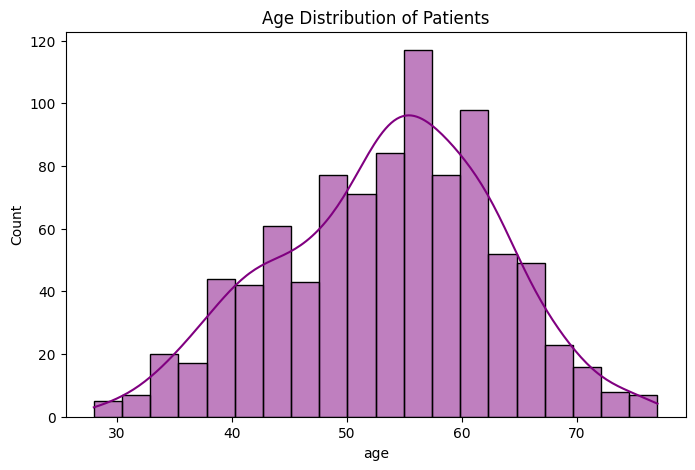

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["age"], bins=20, kde=True, color="purple")
plt.title("Age Distribution of Patients")
plt.show()


# Heart Disease Count by Gender

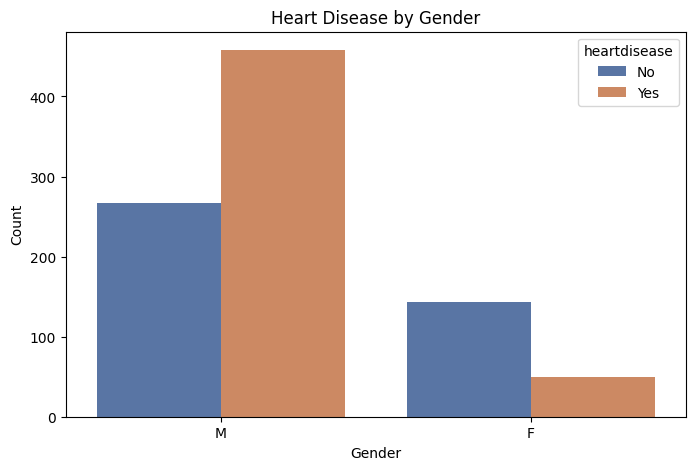

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="sex", hue="heartdisease", data=df, palette="deep")
plt.title("Heart Disease by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


# Heart Disease by Age

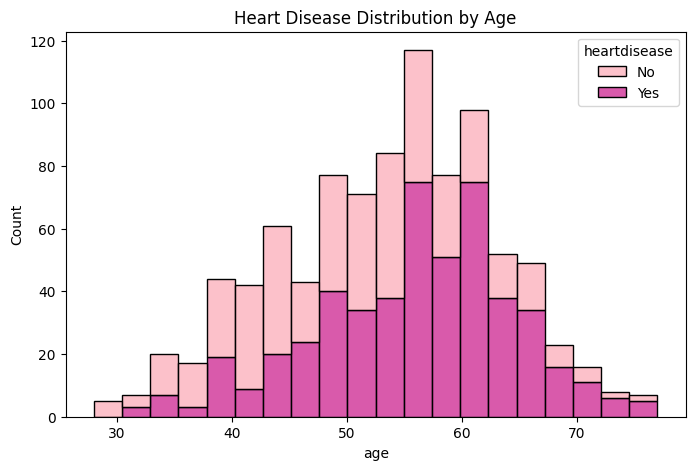

In [159]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="age", hue="heartdisease",multiple="stack" ,bins=20,palette="RdPu")
plt.title("Heart Disease Distribution by Age")
plt.show()

# Chest Pain Type vs Heart Disease

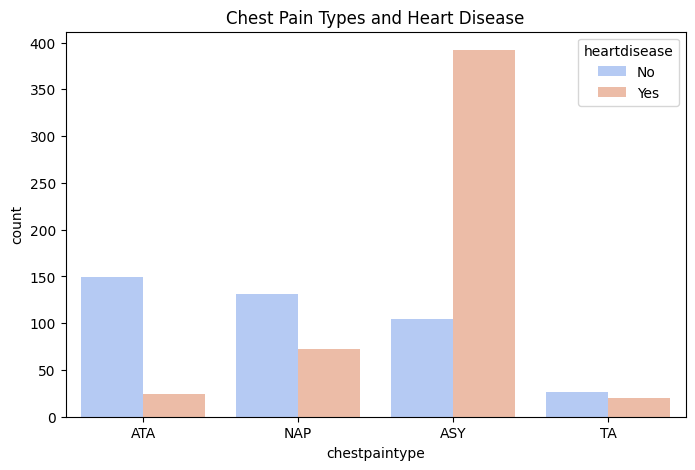

In [160]:
plt.figure(figsize=(8,5))
sns.countplot(x="chestpaintype", hue="heartdisease", data=df, palette="coolwarm")
plt.title("Chest Pain Types and Heart Disease")
plt.show()

# Resting ECG vs Heart Disease

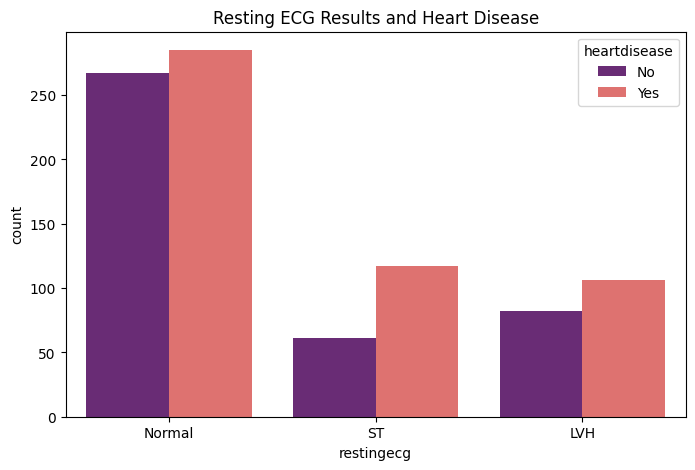

In [161]:
plt.figure(figsize=(8,5))
sns.countplot(x="restingecg", hue="heartdisease", data=df, palette="magma")
plt.title("Resting ECG Results and Heart Disease")
plt.show()

# Exercise Angina vs Heart Disease

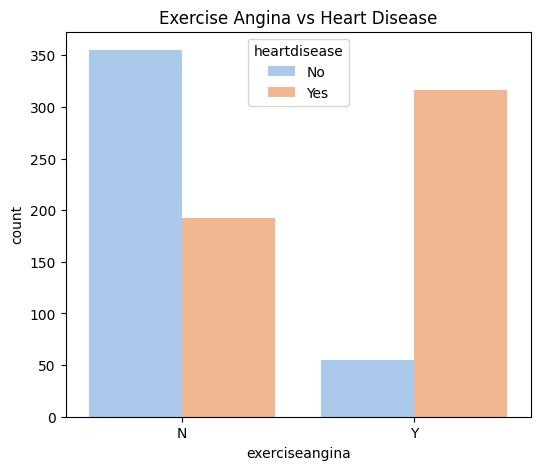

In [162]:
plt.figure(figsize=(6,5))
sns.countplot(x="exerciseangina", hue="heartdisease", data=df, palette="pastel")
plt.title("Exercise Angina vs Heart Disease")
plt.show()

# Cholesterol vs Heart Disease

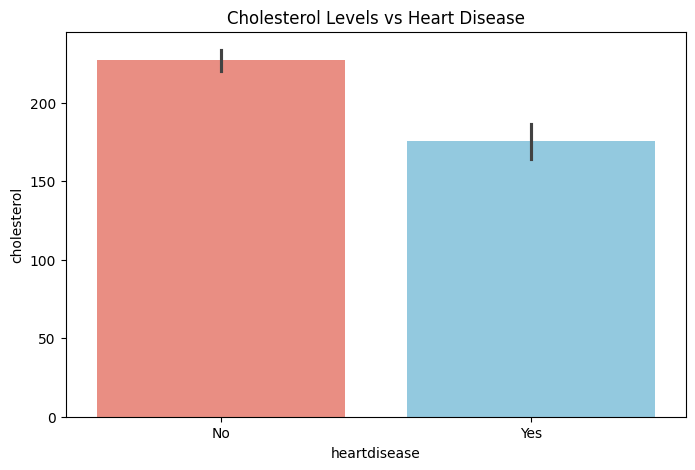

In [163]:

plt.figure(figsize=(8,5))
colors=['salmon','skyblue']
sns.barplot(y="cholesterol",x="heartdisease",hue='heartdisease',data=df,palette=colors)
plt.title("Cholesterol Levels vs Heart Disease")
plt.show()



# Cholesterol vs Resting BP

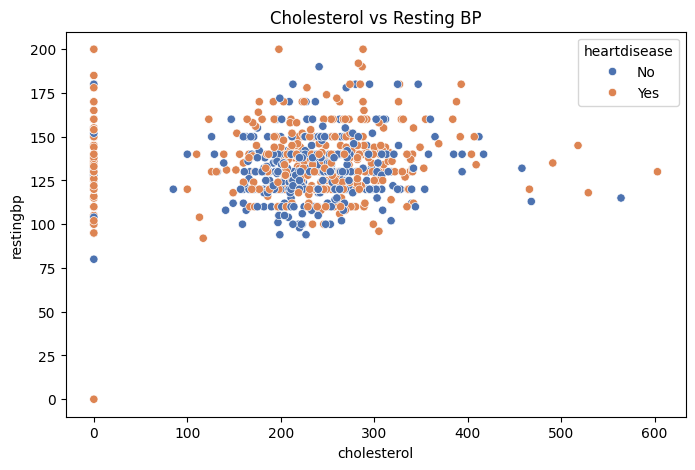

In [164]:

plt.figure(figsize=(8,5))
sns.scatterplot(x="cholesterol", y="restingbp", hue="heartdisease", data=df, palette="deep")
plt.title("Cholesterol vs Resting BP")
plt.show()

# Line chart: Average MaxHR by Age

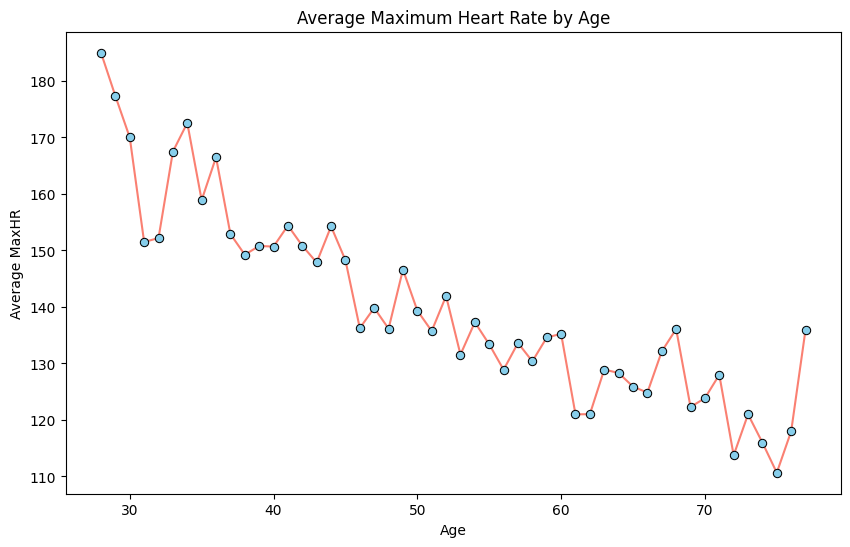

In [165]:

line_data = df.groupby("age")["maxhr"].mean()
plt.figure(figsize=(10,6))
sns.lineplot(x=line_data.index, y=line_data.values, marker="o",markerfacecolor="skyblue",markeredgecolor="black",color="salmon")
plt.title("Average Maximum Heart Rate by Age")
plt.xlabel("Age")
plt.ylabel("Average MaxHR")
plt.show()

# Pie chart Heart Disease distribution

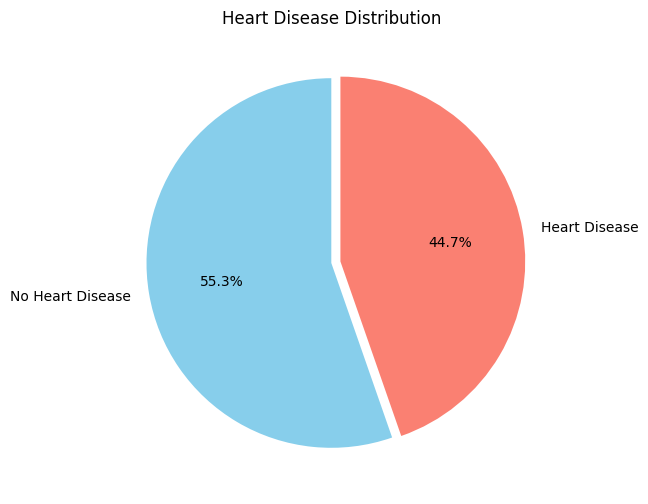

In [166]:
plt.figure(figsize=(6,6))
Heart_counts=df["heartdisease"].value_counts()
plt.pie(Heart_counts,labels=["No Heart Disease", "Heart Disease"],autopct="%1.1f%%",startangle=90,colors=["skyblue", "salmon"],
        explode=[0, 0.05]) 
plt.title("Heart Disease Distribution")
plt.show()

# Correlation Heatmap

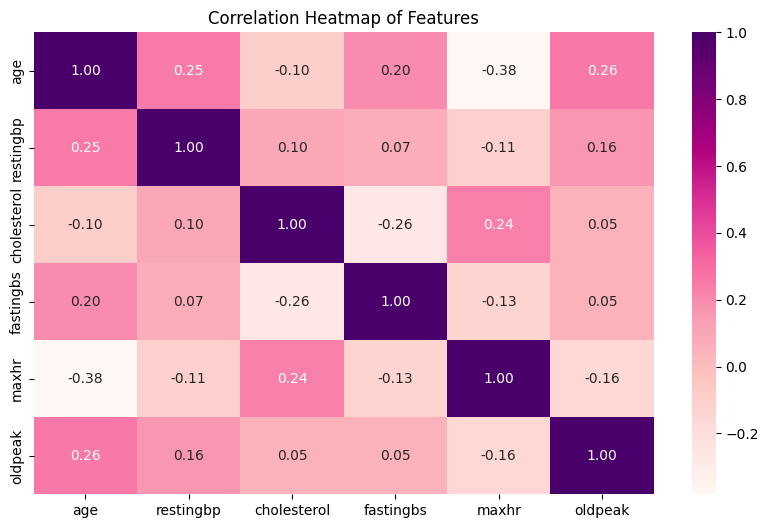

In [167]:

plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="RdPu", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

In [179]:
conn.close()
if conn.close()==0:
    print("connection open")
else:
    print("connection close")

connection close
